## Loading and Preprocessing 

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [29]:
df=pd.read_csv('CarPrice_Assignment.csv')  
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [32]:
# DATA EXPLORATION
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [34]:
df.shape

(205, 26)

In [36]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [20]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [21]:
df['CarName'].nunique()

147

In [22]:
df['CarName'].value_counts()


CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [23]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [24]:
df['fueltype'].nunique()

2

In [25]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [27]:
len(df)

205

In [29]:
len(df.CarName)

205

In [30]:
# DATA CLEANING
# checking for duplicates
df.duplicated().sum()

0

In [31]:
# missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [32]:
df.duplicated().sum()

0

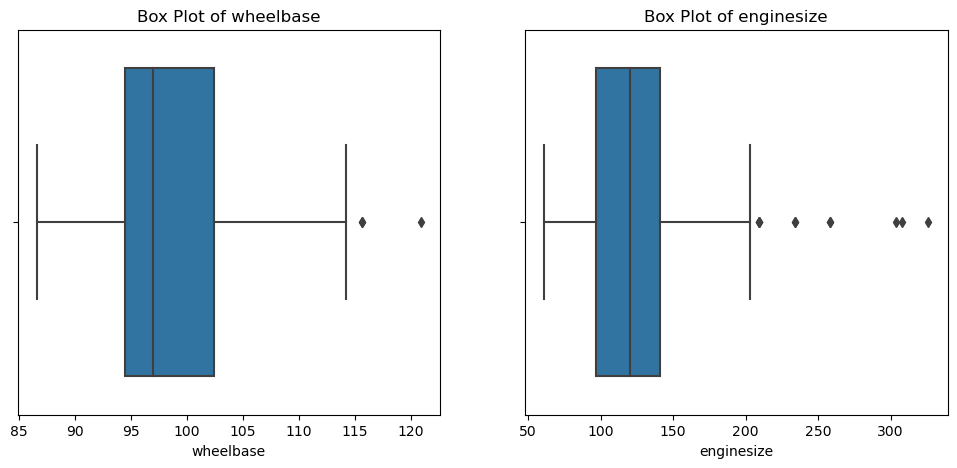

In [35]:
#outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['wheelbase'])
plt.title('Box Plot of wheelbase')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['enginesize'])
plt.title('Box Plot of enginesize')
plt.show()

In [ ]:
# Replace the value 0 in 'symboling' as NaN
df['symboling'].replace(0,np.nan)

In [39]:
# Renaming
df.rename(columns={'CarName': 'Car_Name'}, inplace=True)

In [40]:
df.head

<bound method NDFrame.head of      car_ID  symboling                  Car_Name fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible     

In [41]:
# DATA ENCODING
# ONE HOT ENCODING
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [42]:
encoder=OneHotEncoder()

In [45]:
df_encoded = pd.get_dummies(df, columns=['Car_Name','fueltype','stroke','doornumber'], drop_first=True)
print(df_encoded)

     car_ID  symboling aspiration      carbody drivewheel enginelocation  \
0         1          3        std  convertible        rwd          front   
1         2          3        std  convertible        rwd          front   
2         3          1        std    hatchback        rwd          front   
3         4          2        std        sedan        fwd          front   
4         5          2        std        sedan        4wd          front   
..      ...        ...        ...          ...        ...            ...   
200     201         -1        std        sedan        rwd          front   
201     202         -1      turbo        sedan        rwd          front   
202     203         -1        std        sedan        rwd          front   
203     204         -1      turbo        sedan        rwd          front   
204     205         -1      turbo        sedan        rwd          front   

     wheelbase  carlength  carwidth  carheight  ...  stroke_3.47 stroke_3.5  \
0       

In [66]:
# LABEL ENCODING
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [68]:
label_encoder = LabelEncoder()

In [70]:
df['stroke_encoded'] = label_encoder.fit_transform(df['stroke'])
df['doornumber_encoded'] = label_encoder.fit_transform(df['doornumber'])
print(df['stroke_encoded'])
print(df['doornumber_encoded'])

0       4
1       4
2      28
3      25
4      25
       ..
200    15
201    15
202     7
203    25
204    15
Name: stroke_encoded, Length: 205, dtype: int64
0      1
1      1
2      1
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: doornumber_encoded, Length: 205, dtype: int32


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [74]:
scaler_standard = StandardScaler()
standard_scaled = scaler_standard.fit_transform(df[['price']])
df_standard_scaled = pd.DataFrame(standard_scaled, columns=['price'])
print(df_standard_scaled)

        price
0    0.027391
1    0.404461
2    0.404461
3    0.084485
4    0.523668
..        ...
200  0.447752
201  0.723810
202  1.029983
203  1.153582
204  1.173031

[205 rows x 1 columns]


In [76]:
scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(df[['price']])
df_minmax_scaled = pd.DataFrame(minmax_scaled, columns=['price'])
print(df_minmax_scaled)

        price
0    0.207959
1    0.282558
2    0.282558
3    0.219254
4    0.306142
..        ...
200  0.291123
201  0.345738
202  0.406311
203  0.430763
204  0.434611

[205 rows x 1 columns]


## Model Implementation

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
X = df.drop(columns='price')
y = df['price']
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.723622   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
1 -1.706724   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   -0.014566   
2 -1.689826   0.133509  -0.708596  -0.231513 -0.190566  -0.543527    0.514882   
3 -1.672928   0.938490   0.173698   0.207256  0.136542   0.235942   -0.420797   
4 -1.656029   0.938490   0.107110   0.207256  0.230001   0.235942    0.516807   

   enginesize  boreratio    stroke  ...  cylindernumber_three  \
0    0.074449   0.519071 -1.839377  ...             -0.070014   
1    0.074449   0.519071 -1.839377  ...             -0.070014   
2    0.604046  -2.404880  0.685946  ...             -0.070014   
3   -0.431076  -0.517266  0.462183  ...             -0.070014   
4    0.218885  -0.517266  0.462183  ...             -0.070014   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0              -0.070014           -0.141069        -0.68

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [100]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))

In [102]:
evaluate_model(LinearRegression(), "Linear Regression")


Linear Regression:
MSE: 1.5564698038759582e+33
MAE: 2.247970975329446e+16
R²: -1.9716120189122897e+25


In [104]:
evaluate_model(DecisionTreeRegressor(), "Decision Tree Regressor")


Decision Tree Regressor:
MSE: 11910118.191509489
MAE: 2151.1138292682926
R²: 0.8491321057782795


In [106]:
evaluate_model(RandomForestRegressor(), "Random Forest Regressor")


Random Forest Regressor:
MSE: 3611051.2762366845
MAE: 1347.777024390244
R²: 0.9542580776099386


In [112]:
evaluate_model(GradientBoostingRegressor(), "Gradient Boosting Regressor")


Gradient Boosting Regressor:
MSE: 5267560.476507564
MAE: 1638.3620985613713
R²: 0.9332747380002668


In [126]:
evaluate_model(SVR(), "Support Vector Regressor")


Support Vector Regressor:
MSE: 87001757.6725164
MAE: 5707.042478963921
R²: -0.10206899399185598


{'Model': 'Support Vector Regressor',
 'MSE': 87001757.6725164,
 'MAE': 5707.042478963921,
 'R²': -0.10206899399185598}

## Model Evaluation 

In [122]:
import pandas as pd
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='MSE')  # Lower MSE is better
print("\nModel Comparison:")
print(df_results)


Model Comparison:
                       Model           MSE           MAE            R²
4              Random Forest  3.785979e+06  1.382983e+03  9.520422e-01
2          Gradient Boosting  5.264466e+06  1.636824e+03  9.333139e-01
3              Decision Tree  1.039212e+07  2.090955e+03  8.683609e-01
1  Support Vector Regression  8.700176e+07  5.707042e+03 -1.020690e-01
0          Linear Regression  1.556470e+33  2.247971e+16 -1.971612e+25


In [ ]:
Random Forest is the best model.
Based on the evaluation metrics—Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score ,
the Random Forest Regressor emerges as the best-performing model. It achieved the lowest MSE (3,785,979) and MAE (1,382.98), 
indicating that its predictions are the closest to the actual values with minimal error. 
Additionally, it recorded the highest R² score (0.952), 
which means it explains approximately 95.2% of the variance in the target variable—substantially more than any other model evaluated. 
Compared to alternatives like Gradient Boosting and Decision Tree Regressors, which had higher error rates and lower R² values, 
and Support Vector Regression and Linear Regression, which performed poorly (with negative R² and very large errors), 
Random Forest demonstrated superior accuracy, stability, and generalization. 
Therefore, Random Forest is the most suitable and reliable model for this regression task.

## Feature Importance Analysis

Top Features Affecting Car Prices:
                              Feature  Importance
7                          enginesize    0.540914
6                          curbweight    0.291444
14                         highwaympg    0.042405
11                         horsepower    0.039086
0                              car_ID    0.020183
..                                ...         ...
40           CarName_chevrolet impala    0.000000
150         CarName_volkswagen rabbit    0.000000
133  CarName_toyota corolla 1600 (sw)    0.000000
38              CarName_buick skyhawk    0.000000
30                     CarName_bmw x5    0.000000

[192 rows x 2 columns]


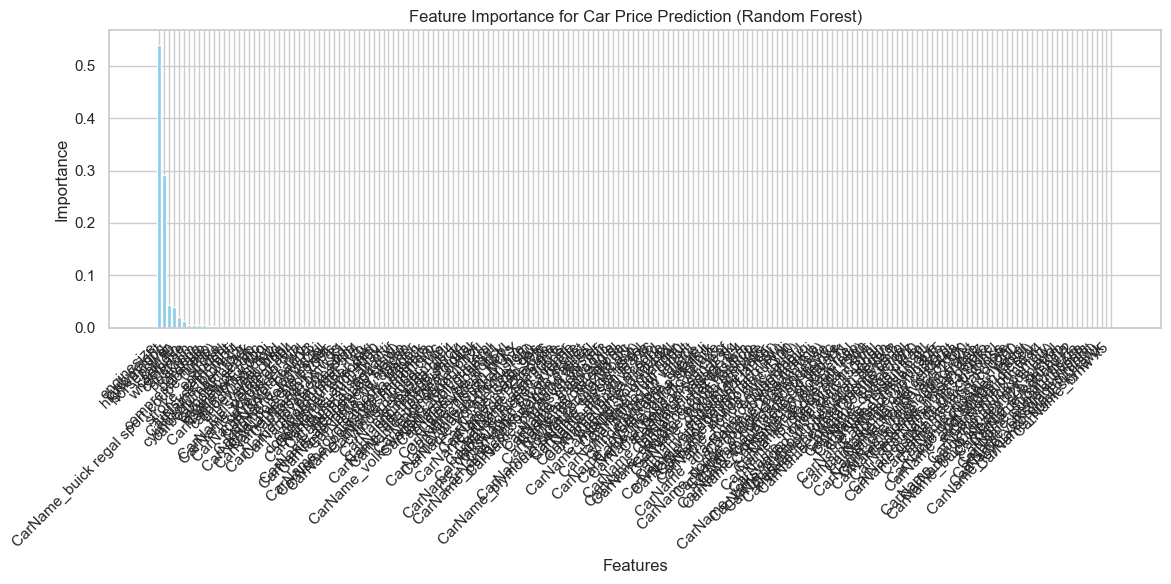

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importances from trained Random Forest model
importances = rf.feature_importances_
feature_names = X_train.columns

# Create DataFrame and sort
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top features
print("Top Features Affecting Car Prices:")
print(feat_imp_df)

# Plot vertical bar graph
plt.figure(figsize=(12, 6))
plt.bar(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Car Price Prediction (Random Forest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create base model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2',  # Or 'neg_mean_squared_error'
                           verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)


# Use the best model
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTuned Random Forest Performance:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

Tuned Random Forest Performance:
MSE: 3612030.71
MAE: 1329.30
R²: 0.9542
